<a href="https://colab.research.google.com/github/descandon88/Analisis-de-Redes/blob/main/analisis_predictivo_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

In [80]:
from google.colab import drive
drive.mount("/content/drive")
print("conexión con drive listo!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
conexión con drive listo!


In [81]:
df_base= pd.read_csv("/content/drive/MyDrive/eci/base/mateo/df_base.csv")

In [82]:
#loc_id = [0,8]
#pro_cod = [ 8415, 105]
#df=df_base[df_base.location_id.isin(loc_id) & 
 #          df_base.product_code.isin(pro_cod)] 

#df = df[df.year != 2020]
df=df_base.copy()
df.head()


,location_id,country_code,country_name,product_code,export_value,year,eci,pci
0,0,ABW,Aruba,8415,127324,1995,-0.149358,1.527974
1,0,ABW,Aruba,7612,141979,1995,-0.149358,2.224087
2,0,ABW,Aruba,7616,28035,1995,-0.149358,1.868267
3,0,ABW,Aruba,106,2336,1995,-0.149358,-2.112441
4,0,ABW,Aruba,4206,41677,1995,-0.149358,0.464937


In [83]:
df=df.drop(columns=['country_code', 'country_name'])
df=df.sort_values(by=['location_id','product_code','year'])

In [84]:
df.head()

,location_id,product_code,export_value,year,eci,pci
47,0,101,18008,1995,-0.149358,1.204200
816,0,101,14473,1999,0.006876,0.954775
1219,0,101,11249,2001,0.141701,1.019034
1415,0,101,9019,2002,-0.189418,1.277552
1608,0,101,8613,2003,-0.199274,1.358104


In [85]:
#df_1 = df.groupby(["location_id","product_code","year"],as_index = True)
df['pcit-1'] = df.groupby(['location_id','product_code'])['pci'].shift(+1)
df['pcit-2'] = df.groupby(['location_id','product_code'])['pci'].shift(+2)
df['pcit-3'] = df.groupby(['location_id','product_code'])['pci'].shift(+3)
df['pcit-4'] = df.groupby(['location_id','product_code'])['pci'].shift(+4)
df['pcit-5'] = df.groupby(['location_id','product_code'])['pci'].shift(+5)
df['ecit-1'] = df.groupby(['location_id','product_code'])['eci'].shift(+1)
df['ecit-2'] = df.groupby(['location_id','product_code'])['eci'].shift(+2)
df['ecit-3'] = df.groupby(['location_id','product_code'])['eci'].shift(+3)
df['ecit-4'] = df.groupby(['location_id','product_code'])['eci'].shift(+4)
df['ecit-5'] = df.groupby(['location_id','product_code'])['eci'].shift(+5)
df=df.fillna(0)
df = df[df.year != 2020]

df1 = df.copy()

#df.sort_values(by=['year']).groupby(['location_id','product_code'])['pci'].shift() 

In [86]:
df1.tail(4)

,location_id,product_code,export_value,year,eci,pci,pcit-1,pcit-2,pcit-3,pcit-4,pcit-5,ecit-1,ecit-2,ecit-3,ecit-4,ecit-5
3716583,250,9999,28367263744,2016,0.732298,1.020175,0.165245,0.754914,0.923022,0.264945,0.435969,0.659868,0.486857,0.491778,0.336530,0.577365
3717785,250,9999,40921464832,2017,0.669892,0.572796,1.020175,0.165245,0.754914,0.923022,0.264945,0.732298,0.659868,0.486857,0.491778,0.336530
3718981,250,9999,47321677824,2018,0.673645,0.571061,0.572796,1.020175,0.165245,0.754914,0.923022,0.669892,0.732298,0.659868,0.486857,0.491778
3720169,250,9999,51257131008,2019,1.250292,0.802621,0.571061,0.572796,1.020175,0.165245,0.754914,0.673645,0.669892,0.732298,0.659868,0.486857


In [87]:
df_y=df1.loc[df1['year']>1999]
Y =  df_y.iloc[:,5].values
Y.shape
#df_y.tail()
#0.843696 - 1.857670 - 0843696

(2961416,)

In [103]:
df_x=df1.loc[ (df1['year']>1999)]
df_x=df_x.iloc[:, [i for i in range(df_x.shape[1]) if i != 5]]
#df_x=df1.loc[(df1['year']!=2019) & (df1['year']>1999)]

X = df_x.iloc[:,0:16].values
X.shape
#df_x.head(5)

(2961416, 15)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=8)

#X_train, X_test, y_train, y_test = train_test_split(train, test,
 #   test_size=0.2, , random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))


X_train shape: (1776849, 15)
X_test shape: (592284, 15)
y_train shape: (1776849,)
y_test shape: (592284,)
X_val shape: (1776849,)
y val shape: (592284,)


In [105]:
from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(n_estimators=10, random_state=30)
#model = RandomForestRegressor(n_estimators=50, random_state=0, bootstrap=True)
regressor = RandomForestRegressor(n_estimators=45, oob_score = True,random_state=1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=45, oob_score=True, random_state=1)

In [106]:
from sklearn.metrics import mean_absolute_error
y_pred=regressor.predict(X_test)
# Printing the metrics
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Random Forest Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Random Forest Regression Accuracy:  0.9862694653200975
R2 square: 0.9862694653200975
MAE:  0.06964038867570939
MSE:  0.041202448502777836


In [ ]:
pci_pred_2019 = pd.DataFrame(y_pred,columns=["pci_pred_2019"])
pci_pred_2019.head()
pci_current_2019=pd.DataFrame(Y_test,columns=["pci_current_2019"])
pci_current_2019.head()

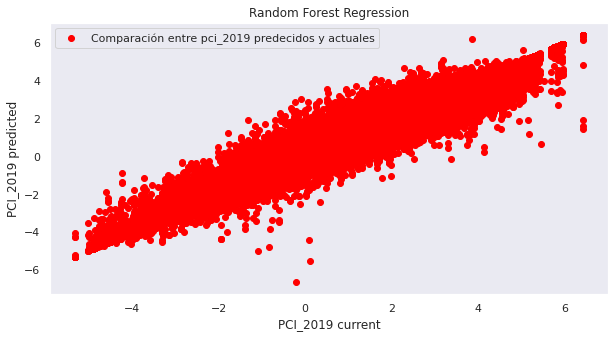

In [107]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color= "red", label ="Comparación entre pci_2019 predecidos y actuales")
plt.legend()
plt.grid()
plt.title("Random Forest Regression")
plt.xlabel("PCI_2019 current")
plt.ylabel("PCI_2019 predicted")
plt.show()

Feature: 0, Score: 0.00110
Feature: 1, Score: 0.03183
Feature: 2, Score: 0.00190
Feature: 3, Score: 0.01942
Feature: 4, Score: 0.00115
Feature: 5, Score: 0.88436
Feature: 6, Score: 0.02385
Feature: 7, Score: 0.01705
Feature: 8, Score: 0.00901
Feature: 9, Score: 0.00821
Feature: 10, Score: 0.00084
Feature: 11, Score: 0.00047
Feature: 12, Score: 0.00033
Feature: 13, Score: 0.00026
Feature: 14, Score: 0.00021


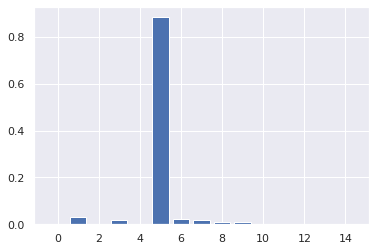

In [108]:
from matplotlib import pyplot
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [111]:
y_pred.shape

(592284,)

In [ ]:
df_tmp = df.groupby(["location_id","product_code","year",'pci','eci','export_value'],as_index = True)['export_value'].count()
df_tmp.head(25)

location_id  product_code  year  pci        eci        export_value
0            105           1999   1.197645   0.006876  1585            1
                           2004  -0.078471  -0.468775  84537           1
                           2008   1.246119  -0.026650  115227          1
                           2009   1.189713   0.677349  1069            1
                           2010   0.798086   1.086779  6825            1
                           2011   0.599276  -0.358337  5838            1
                           2012   0.752623   0.244023  67930           1
                           2013   0.956265   0.705739  51573           1
                           2014   0.747184   0.778916  51208           1
                           2015   0.698812   0.735923  123856          1
                           2016   1.069564   0.974295  97193           1
                           2017   0.682853   0.867450  116356          1
                           2018   0.946808   0.929084  7

In [ ]:
import math
def function_all(data):
  df1_grouped = data.groupby(["location_id","product_code"])
  var = {}
  var1 = {}
  i=0
  for group_name, df_group in df1_grouped:

    print('\n pais / product: {}'.format(group_name))

    for row_index, j in df_group.iterrows():
      anio = math.trunc(j['year'])
      pci = j['pci']
      var[i] = (group_name,anio,pci)
      #var1[i]=pd.DataFrame.from_dict(var[i], orient='index', columns=['pais/product','year', 'pci'])
      i=i+1
    #print(anio,pci)
    
    return var



In [ ]:
from numpy import asarray
function_all(df)
type(var)
var1=pd.DataFrame.from_dict(var, orient='index',
                       columns=['pais/product','year', 'pci'])

options=['(0, 105)']
## filtro por pais-producto 
#rslt_df = var1.loc[var1['pais/product'].isin(options)] 
rslt_df = var1.drop(columns=['pais/product']).copy()
#rslt_df.info()
#rslt_df.head()
train = asarray(rslt_df)
trainX, trainy = train[:, :-1], train[:, -1]



 pais / product: (0, 105)


In [ ]:

def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]



In [ ]:
values = rslt_df.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)

mae, y, yhat = walk_forward_validation(rslt_df, 6)
print('MAE: %.3f' % mae)

NameError: ignored

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'atable':     ['Users', 'Users', 'Domains', 'Domains', 'Locks'],
    'column':     ['col_1', 'col_2', 'col_a', 'col_b', 'col'],
    'column_type':['varchar', 'varchar', 'int', 'varchar', 'varchar'],
    'is_null':    ['No', 'No', 'Yes', 'No', 'Yes'],
})

df1_grouped = df1.groupby('atable')
df1_grouped.head()
# iterate over each group
for group_name, df_group in df1_grouped:
    print('\nCREATE TABLE {}('.format(group_name))

    for row_index, row in df_group.iterrows():
        col = row['column']
        column_type = row['column_type']
        is_null = 'NOT NULL' if row['is_null'] == 'No' else ''
        print('\t{} {} {},'.format(col, column_type, is_null))

    print(");")
df1_grouped.head()



CREATE TABLE Domains(
	col_a int ,
	col_b varchar NOT NULL,
);

CREATE TABLE Locks(
	col varchar ,
);

CREATE TABLE Users(
	col_1 varchar NOT NULL,
	col_2 varchar NOT NULL,
);


,atable,column,column_type,is_null
0,Users,col_1,varchar,No
1,Users,col_2,varchar,No
2,Domains,col_a,int,Yes
3,Domains,col_b,varchar,No
4,Locks,col,varchar,Yes


In [ ]:
for year, pci in df.iteritems():
    print('{year}: {value}'.format(year=year, value=pci[0]))

location_id: 0
product_code: 8415
export_value: 127324
year: 1995
eci: -0.14935778999065494
pci: 1.5279737184355158


In [ ]:
for column in df[['year','pci']]:
   columnSeriesObj = df[column]
   print('Column Name :' , column,'Column contents :' , columnSeriesObj)
   #print('Column contents :' , columnSeriesObj)


Column Name : year Column contents : 0         1995
126       1996
334       1997
538       1998
745       1999
          ... 
117724    2017
118093    2018
118794    2018
119148    2019
119851    2019
Name: year, Length: 86, dtype: int64
Column Name : pci Column contents : 0         1.527974
126       1.759704
334       1.761633
538       1.796328
745       1.601868
            ...   
117724    0.682853
118093    2.092105
118794    0.946808
119148    1.857670
119851    0.843696
Name: pci, Length: 86, dtype: float64


In [ ]:
    # Yields a tuple of column name and series for each column in the dataframe
    for (columnName, columnData) in df.iteritems():
       print('Colunm Name : ', columnName)
       print('Column Contents : ', columnData.values)

In [ ]:
for index in range(df.shape[1]):
       print('Column Number : ', index)
       # Select column by index position using iloc[]
       columnSeriesObj = df.iloc[: , index]
       print('Column Contents : ', columnSeriesObj.values)
